Solve the Maxwell model for a time varying stress.  Solve in `sympy` and plot with `numpy` (you'll get better plotting performance.  You will be graded on your solution as well as your visualization and written response.  Choose a forcing function such as:

$$\sigma(t) = \sigma_0 \sin(\omega t)$$

for this problem.

In [28]:
import sympy as sp
sp.init_session(quiet = True)

In [39]:
sp.var('omega, M, eta, epsilon0, sigma0', real=True, positive=True)
sp.var('t', real = True)
sp.var('epsilon, sigma', cls = Function)

(epsilon, sigma)

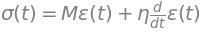

In [40]:
kelvinModel = Eq(sigma(t),M*epsilon(t)+eta*epsilon(t).diff(t))
kelvinModel

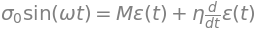

In [41]:
kelvinModelVaryingStress = kelvinModel.subs(sigma(t),sigma0*sp.sin(omega*t))
kelvinModelVaryingStress

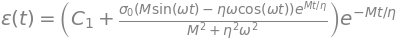

In [42]:

kelvinModelSolution = dsolve(kelvinModelVaryingStress,epsilon(t))
kelvinModelSolution

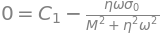

In [43]:
equationToSolveForC = kelvinModelSolution.subs([(epsilon(t),0),(t,0)])
equationToSolveForC.doit()

In [44]:
var('C1')

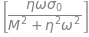

In [45]:
solve(equationToSolveForC.rhs,C1)

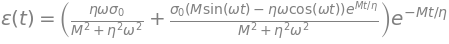

In [46]:
modeled = kelvinModelSolution.subs(C1,((omega*eta*sigma0)/(M**2 +eta**2*omega**2))).collect(sigma0,)
modeled

In [47]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [48]:

numModeled = sp.lambdify((t),modeled, 'numpy')
#print(numModeled)

tValues = np.arange(0,1.1,0.1)
tValLin = np.linspace(0,1,100)
fig = plt.figure()

axes = fig.add_axes([0.1,0.1,0.8,0.8]) #left,bottom, width, height 0-1

axes.plot(tValues, numModeled(tValues),color = 'g')
axes.set_xlabel('t')
axes.set_ylabel('epsilon')

plt.show()

NameError: name 'epsilon' is not defined